In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import scipy.ndimage.morphology as morphology

In [14]:
desired_width = 2000
pixel_size = 40

x = 750
n_pixels = np.floor((desired_width / 40) /2)
width = ((n_pixels*2)+1)*400
print(f'N pixels: {n_pixels}\nActual width: {width}')

N pixels: 25.0
Actual width: 20400.0


slice(23, 28, None) slice(23, 28, None)


Text(0.5, 1.0, 'Width: 2040m')

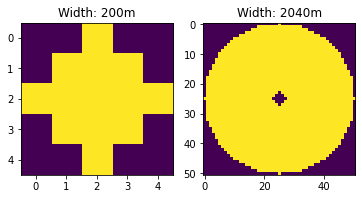

In [15]:
from skimage import morphology
filter_par = [2,25]

local_kernel = morphology.disk(filter_par[0], np.float32)
regional_kernel = morphology.disk(filter_par[1], np.float32)

center = slice(filter_par[1]-filter_par[0],filter_par[1]+filter_par[0]+1)
print(center,center)
regional_kernel[center,center] =  regional_kernel[center,center] - local_kernel

local_kernel = local_kernel / local_kernel.flatten().sum()
# local_filt = ndimage.convolve(data, local_kernel)

regional_kernel = regional_kernel / regional_kernel.flatten().sum()
# regional_filt = ndimage.convolve(data, regional_kernel)

f, (ax1,ax2) = plt.subplots(1,2)
img1 = ax1.imshow(local_kernel,interpolation='none')
ax1.set_title(f'Width: {local_kernel.shape[0]*40}m')
img2 = ax2.imshow(regional_kernel,interpolation='none')
ax2.set_title(f'Width: {regional_kernel.shape[0]*40}m')

## Start

In [140]:
def og(filter_par,data):
        local_kernel = morphology.disk(filter_par[0], np.float32)
        regional_kernel = morphology.disk(filter_par[1], np.float32)

        center = slice(int(filter_par[1]-filter_par[0]),int(filter_par[1]+filter_par[0]+1))
        regional_kernel[center,center] =  regional_kernel[center,center] - local_kernel

        local_kernel = local_kernel / local_kernel.flatten().sum()
        local_filt = ndimage.convolve(data, local_kernel)

        regional_kernel = regional_kernel / regional_kernel.flatten().sum()
        regional_filt = ndimage.convolve(data, regional_kernel)

        data_filt = regional_filt - local_filt

        return(data_filt)

In [139]:
def new(filter_par,data):
    local_kernel = morphology.disk(filter_par[0], np.float32)
    local_kernel = np.pad(local_kernel,filter_par[1] - filter_par[0],mode='constant')

    mask = local_kernel == 1

    regional_kernel = morphology.disk(filter_par[1], np.float32)
    regional_kernel[mask] = 0

    local_kernel /= local_kernel.sum(axis=(0,1))
    regional_kernel /= regional_kernel.sum(axis=(0,1))
    
    combined_kernel = regional_kernel - local_kernel
    data_filt = ndimage.convolve(data, combined_kernel)

    return data_filt

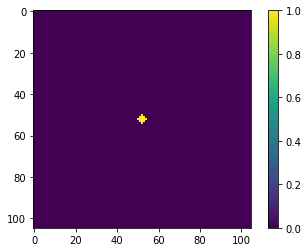

In [145]:
in_data = np.pad(morphology.disk(2).astype('float32'),50)
# in_data += np.random.rand(in_data.shape[0],in_data.shape[1]).astype('float32')
fitler_par = [2,25]

plt.imshow(in_data,interpolation='none')
plt.colorbar()

CPU times: user 174 ms, sys: 23 µs, total: 174 ms
Wall time: 171 ms


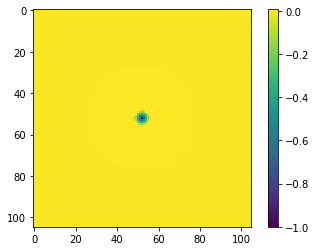

In [146]:
%%time
og_data = og(fitler_par,in_data)

plt.imshow(og_data,interpolation='none')
plt.colorbar()

CPU times: user 157 ms, sys: 9.98 ms, total: 167 ms
Wall time: 161 ms


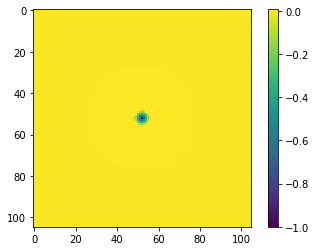

In [147]:
%%time
new_data = new(fitler_par,in_data)

plt.imshow(new_data,interpolation='none')
plt.colorbar()

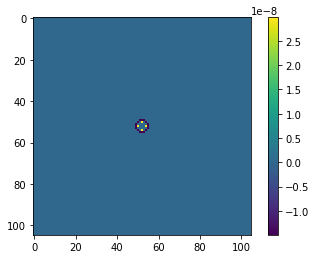

In [149]:
diff = og_data - new_data
plt.imshow(diff,interpolation='none')#,vmin=-0.0001,vmax=0.0001)
plt.colorbar()

In [122]:
ls ../

'/mnt/i/hyp3_insar'

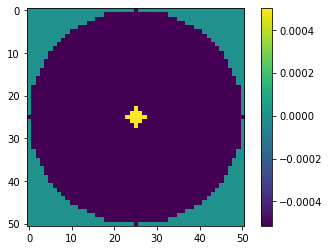

In [67]:
local_kernel = morphology.disk(filter_par[0], np.float32)
local_kernel = np.pad(local_kernel,filter_par[1] - filter_par[0],mode='constant')

mask = local_kernel == 1

regional_kernel = morphology.disk(filter_par[1], np.float32)
regional_kernel[mask] = 0

local_kernel /= local_kernel.sum(axis=(0,1))
regional_kernel /= regional_kernel.sum(axis=(0,1))

combined_kernel = local_kernel - regional_kernel

plt.imshow(combined_kernel,interpolation='none',vmax=0.0005)
plt.colorbar()

In [54]:
regional_kernel.shape, local_kernel.shape

((51, 51), (51, 51))